In [1]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')

# Which model goes into production

In [2]:
from sklearn.metrics import classification_report
import numpy as np


def display_classification_reports():
    rng = np.random.RandomState(1)
    y_true = rng.binomial(n=1, p=0.2, size=1000)

    # model a
    model_a_recall = rng.binomial(n=1, p=0.8, size=1000)
    model_a_precision = rng.binomial(n=1, p=1-0.9, size=1000)
    y_pred_a = np.where(y_true == 1, model_a_recall, model_a_precision)

    # model b
    model_a_recall = rng.binomial(n=1, p=0.82, size=1000)
    model_a_precision = rng.binomial(n=1, p=1-0.88, size=1000)
    y_pred_b = np.where(y_true == 1, model_a_recall, model_a_precision)

    # print confusion matrices
    print(classification_report(y_true, y_pred_a))
    print(classification_report(y_true, y_pred_b))

In [3]:
display_classification_reports()

             precision    recall  f1-score   support

          0       0.93      0.92      0.92       804
          1       0.67      0.70      0.69       196

avg / total       0.88      0.88      0.88      1000

             precision    recall  f1-score   support

          0       0.96      0.88      0.91       804
          1       0.62      0.84      0.72       196

avg / total       0.89      0.87      0.88      1000



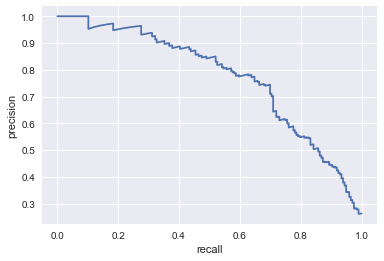

In [4]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
y_true = rng.binomial(n=1, p=0.2, size=1000)
y_pred = np.where(y_true == 1, rng.beta(a=5, b=2, size=1000), rng.beta(a=3, b=5, size=1000))
p, r, _ = precision_recall_curve(y_true, y_pred)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(r, p)

In [6]:
y_true = np.random.uniform(0, 10, size=100)
y_pred = y_true + np.random.normal(0, 1, size=100)

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

0.9749853042024936

## When do we retrain this production model?

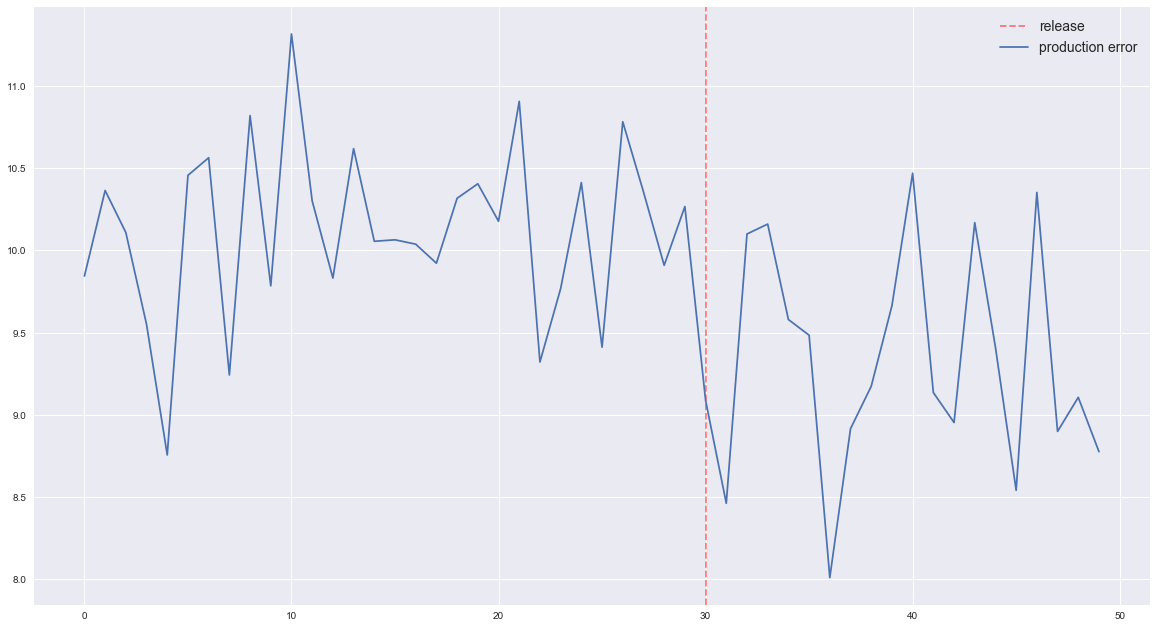

In [74]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

rng = np.random.RandomState(6)
x1 = rng.normal(10, 0.5, size=30)
x2 = rng.normal(9.5, .7, size=20)

fig, ax = plt.subplots(figsize=(20, 11))

ax.axvline(30, color='r', ls='--', alpha=0.5, label='release')
ax.plot(range(50), np.concatenate([x1, x2]), label='production error')
ax.legend(fontsize=14)

plt.savefig('production-error.png')

# Precision/Recall

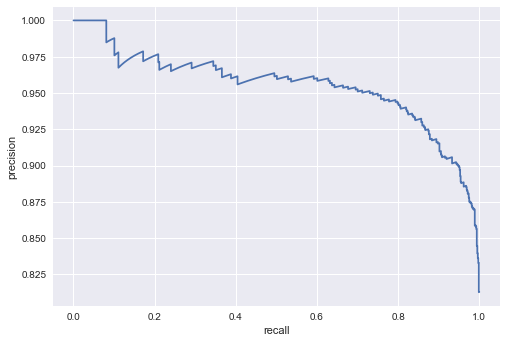

In [3]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np
from sklearn.metrics import precision_recall_curve

rng = np.random.RandomState(1)
y_true = rng.binomial(p=0.8, n=1, size=1000)
y_pred = np.where(y_true == 1, rng.beta(a=5, b=3, size=1000), rng.beta(a=2, b=4, size=1000))
p, r, _ = precision_recall_curve(y_true, y_pred)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(r, p)

# All models are wrong by experience

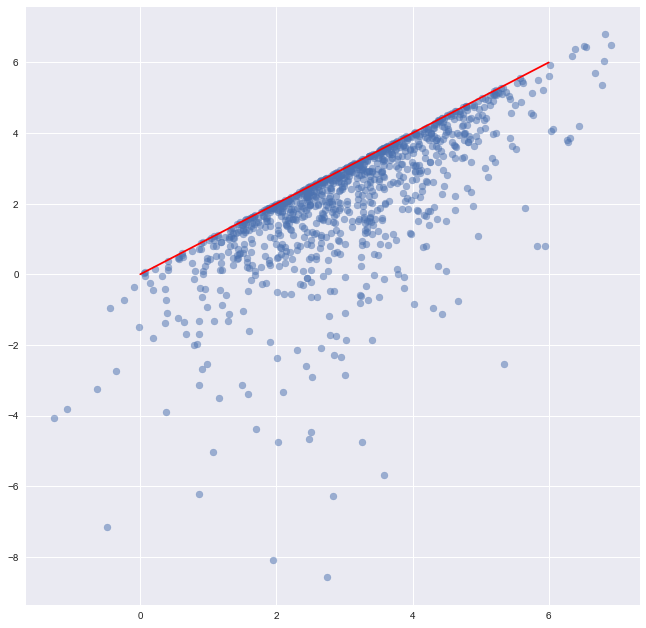

In [69]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

y = np.log10(np.random.lognormal(mean=7, sigma=3, size=1000))
y_hat_bad = y - np.random.normal(0, 1, size=1000)**2

fig, ax = plt.subplots(figsize=(11, 11))
ax.scatter(y, y_hat_bad, alpha=0.5)
ax.plot([0, 6], [0, 6], color='r') 
plt.savefig('bad-regression.png')

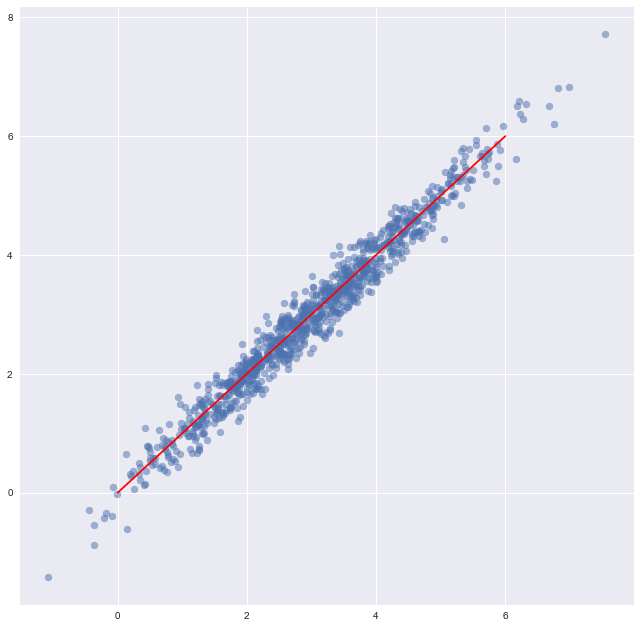

In [70]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

y = np.log10(np.random.lognormal(mean=7, sigma=3, size=1000))
y_hat_better = y + np.random.normal(0, 0.25, size=1000)

fig, ax = plt.subplots(figsize=(11, 11))
ax.scatter(y, y_hat_better, alpha=0.5)
ax.plot([0, 6], [0, 6], color='r') 
plt.savefig('better-regression.png')

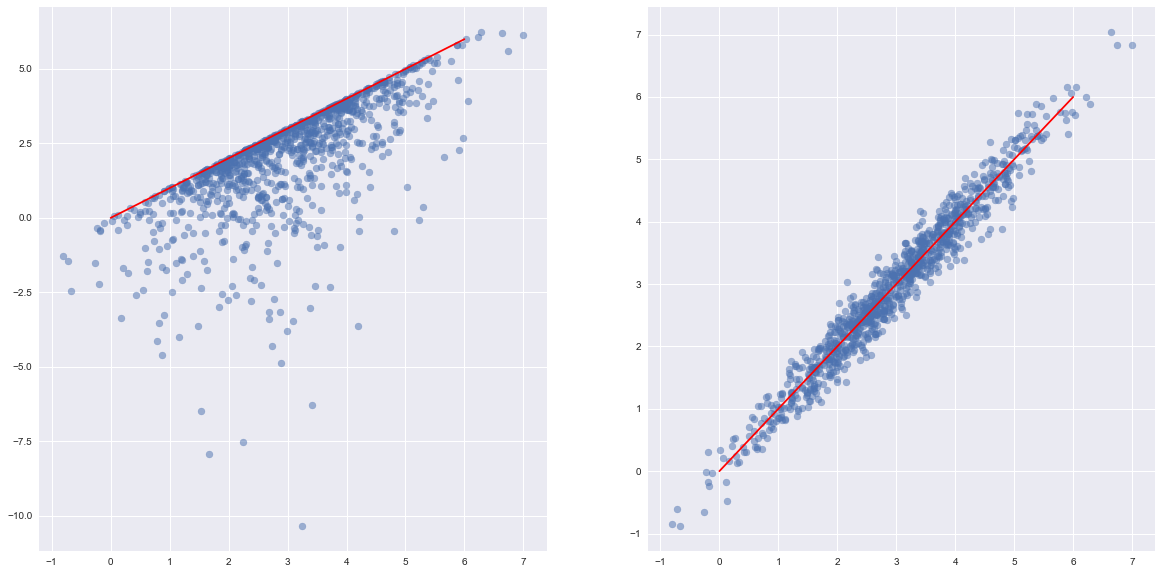

In [58]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

y = np.log10(np.random.lognormal(mean=7, sigma=3, size=1000))
y_hat_bad = y - np.random.normal(0, 1, size=1000)**2
y_hat_better = y + np.random.normal(0, 0.25, size=1000)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(y, y_hat_bad, alpha=0.5)
axs[1].scatter(y, y_hat_better, alpha=0.5)

for ax in axs:
    ax.plot([0, 6], [0, 6], color='r')
    
plt.savefig('regression-side-by-side.png')